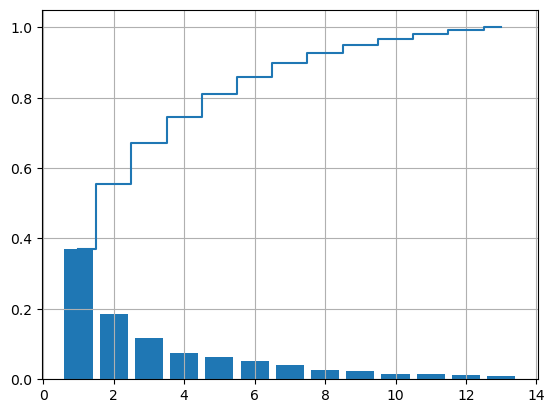

In [ ]:
import numpy as np
import pandas as pd

# 주성분 추출 단계
# 1. 데이터를 표준화 처리
# 2. 공분산 행렬
# 3. 행렬분석(고유값 분해) : 고유값, 고유벡터 분해
# 4. 고유값을 내림차순 정려 => 고유백터주성분)의 순위

# 데이터 로딩
df_wine=pd.read_csv(
    '../wine.data'
    ,header=None
    ,encoding='utf-8'
)

# 데이터와 답을 분리
X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
# print(f'wine data의 shape : {df_wine.shape}')
# print(f'X의 shape : {X.shape}')
# print(f'y의 shape : {y.shape}')

# 학습데이터와 테스트데이터 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.3
    ,stratify=y
    ,random_state=0
)
# print(f'X_train의 shape : {X_train.shape}')
# print(f'X_test의 shape : {X_test.shape}')
# print(f'y_train의 shape : {y_train.shape}')
# print(f'y_test의 shape : {y_test.shape}')

# 특성을 표준화 : StandardScaler 사용
from sklearn.preprocessing import StandardScaler

# StandardScaler 오브젝트 생성
sc = StandardScaler()

# 학습 데이터에 대해 표준화 진행
X_train_std = sc.fit_transform(X_train)  # fit_transform gives standardized data

# 테스트 데이터는 학습 데이터로부터 계산된 평균과 표준편차를 사용하여 표준화
X_test_std = sc.transform(X_test)

# 공분산 행렬
cov_mat = np.cov(X_train_std.T) 
# print(f'공분산\n{cov_mat}')

# 고유값 분해
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# 고윳값 출력
# print(f'고윳값\n{eigen_vals}')
# print(f'고윳벡터의 차원\n{eigen_vecs.shape}')
# print(f'고유벡터\n{eigen_vecs}')

# 총분산과 설명된 분산
tot=np.sum(eigen_vals) #고유값의 전체 합
# 고유값 비율
var_exp=[
    (i/tot) for i in sorted(eigen_vals,reverse=True)
]
# 고유값 비율의 누적합
cum_var_exp = np.cumsum(var_exp)

# 시각화
import matplotlib.pyplot as plt

plt.bar(
    range(1,len(var_exp)+1)
    , var_exp
    ,align='center'
)
plt.step(
    range(1,len(var_exp)+1)
    , cum_var_exp
    ,where='mid'
)
plt.grid()
plt.show()

In [26]:
import numpy as np
import pandas as pd

df_wine=pd.read_csv(
    '../wine.data'
    ,header=None
    ,encoding='utf-8'
)

X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.3
    ,stratify=y
    ,random_state=0
)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)  

X_test_std = sc.transform(X_test)

cov_mat = np.cov(X_train_std.T) 

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot=np.sum(eigen_vals) 

var_exp=[
    (i/tot) for i in sorted(eigen_vals,reverse=True)
]

cum_var_exp = np.cumsum(var_exp)

# 고유값, 고유 벡터 튜플의 리스트 처리
eigen_pairs=[
    (
        np.abs(eigen_vals[idx])
        , eigen_vecs[:,idx]
    ) for idx in range(len(eigen_vals))
]

# 내림차순 정렬
eigen_pairs.sort(
    key=lambda k :k[0]
    ,reverse=True
)

w = np.hstack((
    eigen_pairs[0][1][:, np.newaxis],  
    eigen_pairs[1][1][:, np.newaxis]   
))

print(f'투영 행렬\n{w}')

투영 행렬
[[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


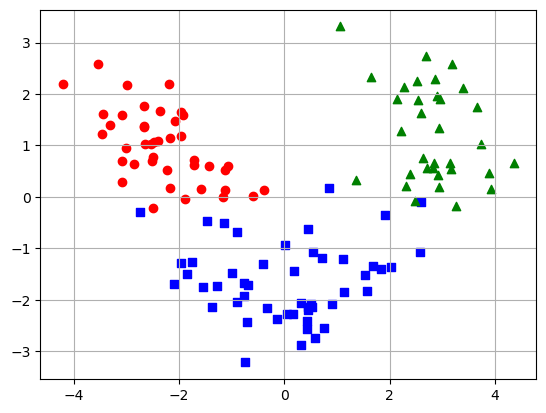

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_wine=pd.read_csv(
    '../wine.data'
    ,header=None
    ,encoding='utf-8'
)

X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.3
    ,stratify=y
    ,random_state=0
)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)  

X_test_std = sc.transform(X_test)

cov_mat = np.cov(X_train_std.T) 

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot=np.sum(eigen_vals) 

var_exp=[
    (i/tot) for i in sorted(eigen_vals,reverse=True)
]

cum_var_exp = np.cumsum(var_exp)

# 고유값, 고유 벡터 튜플의 리스트 처리
eigen_pairs=[
    (
        np.abs(eigen_vals[idx])
        , eigen_vecs[:,idx]
    ) for idx in range(len(eigen_vals))
]

# 내림차순 정렬
eigen_pairs.sort(
    key=lambda k :k[0]
    ,reverse=True
)

w = np.hstack((
    eigen_pairs[0][1][:, np.newaxis],  
    eigen_pairs[1][1][:, np.newaxis]   
))

X_train_pca=X_train_std.dot(w)

colors=['r','b','g']
markers=['o','s','^']
for label, color, marker in zip(np.unique(y_train),colors,markers):
    plt.scatter(
        X_train_pca[y_train==label,0]
        ,X_train_pca[y_train==label,1]
        ,c=color
        ,marker=marker
        ,label=f'Class{label}'
    )
plt.grid()
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn PCA
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


df_wine=pd.read_csv(
    '../wine.data'
    ,header=None
    ,encoding='utf-8'
)

X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.3
    ,stratify=y
    ,random_state=0
)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)  

X_test_std = sc.transform(X_test)

# 2차원 차원축소
pca=PCA(
    n_components=2
)
lr=LogisticRegression(
    multi_class='ovr'
    , solver='lbfgs'
)

# 학습데이터/테스트데이터 차원 축소
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

# 모델 훈련
lr.fit(X_train_pca,y_train)

from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_pca)

print(f'정확도 : {accuracy_score(y_pred,y_test)}')

정확도 : 0.9259259259259259


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn PCA
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

df_wine = pd.read_csv(
    '../wine.data'
    , header=None
    , encoding='utf-8'
)

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X
    , y
    , test_size=0.3
    , stratify=y
    , random_state=0
)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
    
X_test_std = sc.transform(X_test)


pca = PCA(
    n_components='mle'
)
pca.fit(X_train_std)


print(f'주성분 개수 : {pca.n_components_}')
print(f'설명된 분산 비율 : {np.sum(pca.explained_variance_ratio_)}')


주성분 개수 : 9
설명된 분산 비율 : 0.949975302918623


C:\Users\TJ\AppData\Local\Temp\ipykernel_20076\33301856.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_wine.columns[0:],rotation=90)


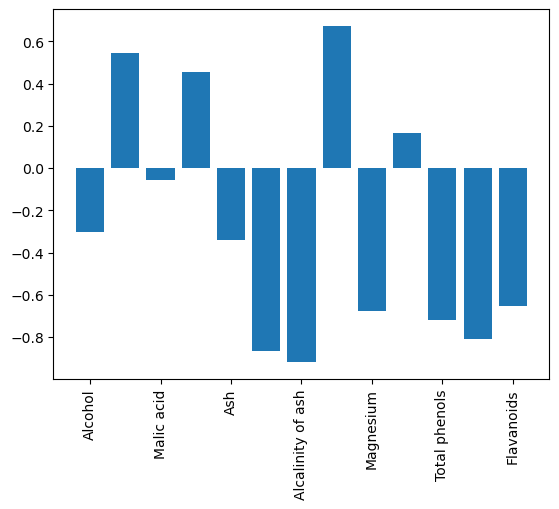

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn PCA
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

df_wine = pd.read_csv(
    '../wine.data'
    , header=None
    , encoding='utf-8'
)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X
    , y
    , test_size=0.3
    , stratify=y
    , random_state=0
)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)  

X_test_std = sc.transform(X_test)

cov_mat = np.cov(X_train_std.T) 

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot=np.sum(eigen_vals) 

var_exp=[
    (i/tot) for i in sorted(eigen_vals,reverse=True)
]

cum_var_exp = np.cumsum(var_exp)

# 고유값, 고유 벡터 튜플의 리스트 처리
eigen_pairs=[
    (
        np.abs(eigen_vals[idx])
        , eigen_vecs[:,idx]
    ) for idx in range(len(eigen_vals))
]

# 내림차순 정렬
eigen_pairs.sort(
    key=lambda k :k[0]
    ,reverse=True
)

w = np.hstack((
    eigen_pairs[0][1][:, np.newaxis],  
    eigen_pairs[1][1][:, np.newaxis]   
))


# 피쳐 기여도 평가
loading=eigen_vecs*np.sqrt(eigen_vals)

# print(f'eigen_vals : {eigen_vals.shape}')
# print(f'eigen_vecs : {eigen_vecs.shape}')
# print(f'loading shape : {loading.shape}')

# 첫번째 주성분에 원본 피쳐가 얼마나 기여했는지 시각화
fig, ax = plt.subplots()
ax.bar(
    range(len(loading)) # X 축
    ,loading[:,0] # 첫번재 주성분
    ,align='center'
)
ax.set_xticklabels(df_wine.columns[0:],rotation=90)
plt.show()

c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


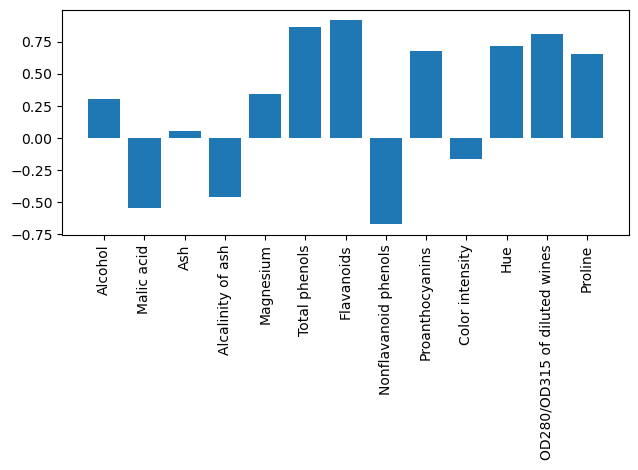

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn PCA
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

df_wine = pd.read_csv(
    '../wine.data'
    , header=None
    , encoding='utf-8'
)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X
    , y
    , test_size=0.3
    , stratify=y
    , random_state=0
)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)  

X_test_std = sc.transform(X_test)



cov_mat = np.cov(X_train_std.T) 

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot=np.sum(eigen_vals) 

var_exp=[
    (i/tot) for i in sorted(eigen_vals,reverse=True)
]

cum_var_exp = np.cumsum(var_exp)

# 고유값, 고유 벡터 튜플의 리스트 처리
eigen_pairs=[
    (
        np.abs(eigen_vals[idx])
        , eigen_vecs[:,idx]
    ) for idx in range(len(eigen_vals))
]

# 내림차순 정렬
eigen_pairs.sort(
    key=lambda k :k[0]
    ,reverse=True
)

w = np.hstack((
    eigen_pairs[0][1][:, np.newaxis],  
    eigen_pairs[1][1][:, np.newaxis]   
))

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)  

X_test_std = sc.transform(X_test)

# 2차원 차원축소
pca=PCA(
    n_components=2
)
lr=LogisticRegression(
    multi_class='ovr'
    , solver='lbfgs'
)

# 학습데이터/테스트데이터 차원 축소
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

# 모델 훈련
lr.fit(X_train_pca,y_train)

from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_pca)
# 피쳐 기여도 평가
loading=eigen_vecs*np.sqrt(eigen_vals)

sklearn_loading=pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()
ax.bar(
    range(len(sklearn_loading))
    ,sklearn_loading[:,0]
    ,align='center'
)
ax.set_ylabel
ax.set_xticks(range(len(sklearn_loading)))
ax.set_xticklabels(df_wine.columns[1:],rotation=90)
plt.tight_layout()
plt.show()

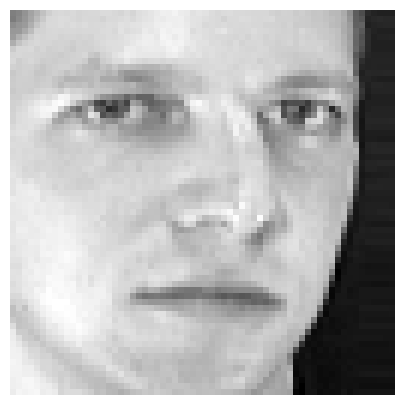

In [16]:
# 사이킷런 패키지 데이터
# 사람얼굴 데이터 : 40명 10장씩 이미지 데이터 : 정체 이미지 개수는 400장
# 1장 이미지(1사람 사진) : 64X64 -> 4096차원
# 전체 데이터 구조 : 400X64X64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces # AT&T 얼굴데이터베이스

# ORL : 얼굴 데이터셋 로딩
faces=np.load('./olivetti_faces.npy')
# faces.shape
#첫번째 이미지 출력
person_id = 0
image_idx=1
plt.figure(figsize=(5,5))
plt.imshow(faces[image_idx],cmap='grey')
plt.axis('off')
plt.show()

In [13]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name="olivetti_faces", version=1)  

X = dataset.data 
y = dataset.target  

print(f"Shape of the image data: {X.shape}")
print(f"Shape of the target labels: {y.shape}")


Shape of the image data: (400, 4096)
Shape of the target labels: (400,)


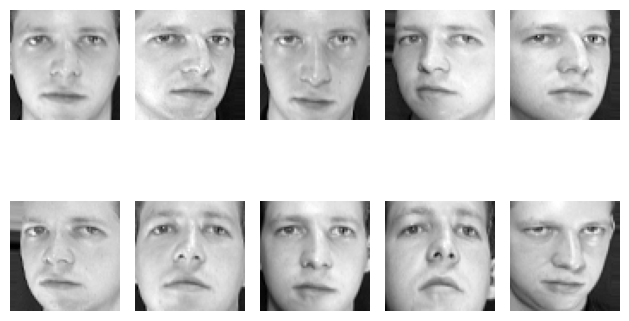

In [22]:
# 사이킷런 패키지 데이터
# 사람얼굴 데이터 : 40명 10장씩 이미지 데이터 : 정체 이미지 개수는 400장
# 1장 이미지(1사람 사진) : 64X64 -> 4096차원
# 전체 데이터 구조 : 400X64X64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces 

# ORL : 얼굴 데이터셋 로딩
faces=np.load('./olivetti_faces.npy')
# faces.shape

# person_id = 0
# image_idx=0
num_images=10
for i in range(num_images):
    plt.subplot(2,5,i+1)
    plt.imshow(faces[i],cmap='grey')
    plt.axis('off')
plt.tight_layout()
plt.show()

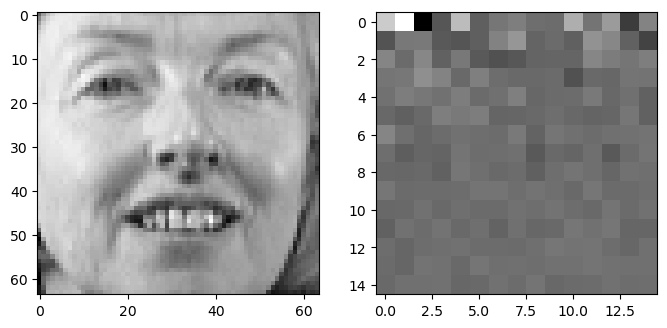

In [18]:
# 사이킷런 패키지 데이터
# 사람얼굴 데이터 : 40명 10장씩 이미지 데이터 : 정체 이미지 개수는 400장
# 1장 이미지(1사람 사진) : 64X64 -> 4096차원
# 전체 데이터 구조 : 400X64X64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces 

# LDA 적용해서 분류
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import accuracy_score, classification_report

# 이미지 데이터
X=np.load('./olivetti_faces.npy')
# 레이블 로딩
y=np.load('./olivetti_faces_target.npy')

# print(f'X shape : {X.shape}')
# print(f'y shape : {y.shape}')
# print(f'unique y : {np.unique(y)}')

# 학습데이터/테스트데이터 분리
X_train, X_test, y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.3
    ,random_state=1
    ,stratify=y
)
# print(f'X_train shape : {X_train.shape}')
# print(f'X_test shape : {X_test.shape}')
# print(f'y_train shape : {y_train.shape}')
# print(f'y_test shape : {y_test.shape}')

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)
# print(f'X_train_2d shape : {X_train_2d.shape}')
# print(f'X_test_2d shape : {X_test_2d.shape}')

# LDA 차원 축소
lda=LDA(
    n_components= len(np.unique(y))-1 # 일반적으로 클래스 수 -1
)
X_train_lda=lda.fit_transform(X_train_2d,y_train)
X_test_lda=lda.transform(X_test_2d)
# print(f'X_train_lda shape : {X_train_lda.shape}')
# print(f'X_test_lda shape : {X_test_lda.shape}')

# KNN
knn = KNeighborsClassifier(
    n_neighbors=len(np.unique(y))
)
knn.fit(X_train_lda,y_train)
# print(f'knn 학습 : {knn.fit(X_train_lda,y_train)}')

y_pred=knn.predict(
    X_test_lda
)

# 성능평가
acc = accuracy_score(y_pred,y_test)
# print(f'LDA를 이용한 얼굴 인식 정확도 : {acc:.3f}')

# 시각화
from sklearn.decomposition import PCA


cnt=15
n_components=cnt**2
# print(n_components)
pca=PCA(n_components=n_components, random_state=1)

pca.fit(X_train_2d)

image_original=X_test_2d[0]
image_pca=pca.transform([image_original])

fig, ax=plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(
    image_original.reshape(X_train[0].shape), cmap='grey'
)

ax[1].imshow(
    image_pca.reshape(cnt,-1), cmap='grey'
)

plt.show()